<a href="https://colab.research.google.com/github/matcarvalho/machine_learning_imoveis/blob/main/Machine_learning_imoveis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Instalação dos pacotes

In [1]:
pip install -U scikit-learn

     |████████████████████████████████| 23.2 MB 1.0 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [2]:
!pip install catboost

     |████████████████████████████████| 76.4 MB 23 kB/s 


In [3]:
!pip install -U yellowbrick

     |████████████████████████████████| 271 kB 32.7 MB/s 
  Attempting uninstall: yellowbrick
    Found existing installation: yellowbrick 0.9.1
    Uninstalling yellowbrick-0.9.1:
      Successfully uninstalled yellowbrick-0.9.1


# Importação das bibliotecas

In [4]:
# Importações
#Bibliotecas para manipulação de dados
import pandas as pd
import numpy as np

#Bibliotecas para manipulação de Gáficos
import seaborn as sns
import matplotlib.pyplot as plt

#Bibliotecas de aprendizado de máquina
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_percentage_error
from sklearn.feature_selection import SelectKBest, mutual_info_regression
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from yellowbrick.contrib.wrapper import wrap
from yellowbrick.regressor import ResidualsPlot


# Reading Data

In [5]:
#Lendo os dados
df = pd.read_csv("intermediate_data.csv")

In [6]:
df.columns

Index(['id', 'url', 'header', 'address', 'area', 'rooms', 'bathrooms',
       'garages', 'price', 'condo', 'bairro', 'crawled_at', 'Academia',
       'Aceita animais', 'Acesso para deficientes', 'Aquecimento',
       'Ar-condicionado', 'Armário embutido', 'Armário embutido no quarto',
       'Armário na cozinha', 'Armário no banheiro', 'Bicicletário',
       'Box blindex', 'Cabeamento estruturado', 'Churrasqueira', 'Cinema',
       'Circuito de segurança', 'Closet', 'Condomínio fechado',
       'Conexão à internet', 'Copa', 'Coworking', 'Cozinha',
       'Cozinha americana', 'Cozinha grande', 'Câmera de segurança',
       'Depósito', 'Elevador', 'Escritório', 'Espaço gourmet', 'Espaço teen',
       'Espaço verde / Parque', 'Espelhos d'água', 'Garage band', 'Garagem',
       'Gerador elétrico', 'Gramado', 'Guarita', 'Gás Encanado', 'Interfone',
       'Janela grande', 'Jardim', 'Lareira', 'Lavabo', 'Lavanderia',
       'Mais de um andar', 'Mobiliado', 'Móvel planejado',
       'Perto de

In [7]:
#Separando os tipo de colunas que vou trabalhar
numerical_features = ["area", "rooms", "bathrooms", "garages"]
categorical_features = ["bairro"]
binary_features = [
    'Academia', 'Aceita animais', 'Acesso para deficientes', 'Aquecimento',
    'Ar-condicionado', 'Armário embutido', 'Armário embutido no quarto',
    'Armário na cozinha', 'Armário no banheiro', 'Bicicletário',
    'Box blindex', 'Cabeamento estruturado', 'Churrasqueira', 'Cinema',
    'Circuito de segurança', 'Closet', 'Condomínio fechado',
    'Conexão à internet', 'Copa', 'Coworking', 'Cozinha',
    'Cozinha americana', 'Cozinha grande', 'Câmera de segurança',
    'Depósito', 'Elevador', 'Escritório', 'Espaço gourmet', 'Espaço teen',
    'Espaço verde / Parque', "Espelhos d'água", 'Garage band', 'Garagem',
    'Gerador elétrico', 'Gramado', 'Guarita', 'Gás Encanado', 'Interfone',
    'Janela grande', 'Jardim', 'Lareira', 'Lavabo', 'Lavanderia',
    'Mais de um andar', 'Mobiliado', 'Móvel planejado',
    'Perto de vias de acesso', 'Piscina', 'Piscina coberta',
    'Piscina infantil', 'Piscina para adulto', 'Piso frio',
    'Pista de cooper', 'Playground', 'Portaria 24h', 'Portão eletrônico',
    'Próximo a escola', 'Próximo a hospitais', 'Próximo a shopping',
    'Próximo a transporte público', 'Quadra de squash', 'Quadra de tênis',
    'Quadra poliesportiva', 'Quintal', 'Recepção', 'Sala de jantar',
    'Sala de massagem', 'Salão de festas', 'Salão de jogos', 'Sauna',
    'Segurança 24h', 'Serviços pay per use', 'Serviços públicos essenciais',
    'Sistema de alarme', 'Spa', 'TV a cabo', 'Varanda',
    'Varanda fechada com vidro', 'Varanda gourmet', 'Vigia',
    'Vista para a montanha', 'Vista para o mar', 'Área de lazer',
    'Área de serviço']
target = "price"

In [8]:
df.isnull().sum()[:10]

id              0
url             0
header          0
address         0
area          615
rooms          17
bathrooms      13
garages        33
price         628
condo        2846
dtype: int64

A coluna condo possui muitos missing:
 - Opção 1: Remover a coluna
 - Opção 2: Remover as observações faltantes
 - Opção 3: Imputation (Completar os valores faltantes)
 - Opção 4: Usar como está

Escolhi a opção remover o condomínio

In [9]:
df = df.dropna(subset=["area","rooms","bathrooms","garages","price"])

# Data pipeline

In [10]:
# Realizando o train test split
X = df[numerical_features + categorical_features + binary_features]
y = df[target]
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=.2, random_state=12345)

In [11]:
#Realizando o Scaler das minhas variáveis numericas
#Criando o objeto MinMaxScaler
scaler = MinMaxScaler()
#Criando a variável data_pipeline para deixar na mesma ordem de grandeza minhas variáveis numericas
data_pipeline = ColumnTransformer([("numerical", scaler, numerical_features)],
                                  remainder = "passthrough")

#Treinando o algoritmo para ele definir os pesos corretos para depois eu realizar a transformação
data_pipeline.fit(x_train)

#Transformando as minhas colunas na mesma ordem de grandeza
x_train_transformed = data_pipeline.transform(x_train) 
x_test_transformed = data_pipeline.transform(x_test)

#Depois que transformo os dados ele gera um Array de numpy, preciso transformar em um DataFrame
x_train_transformed = pd.DataFrame(x_train_transformed, columns=numerical_features+categorical_features+binary_features)
x_test_transformed = pd.DataFrame(x_test_transformed, columns=numerical_features+categorical_features+binary_features)

In [12]:
type(x_test_transformed)

pandas.core.frame.DataFrame

#Feature Selection

In [15]:
selector = SelectKBest(score_func=mutual_info_regression, k="all")
selector.fit(x_train_transformed[numerical_features+binary_features], y_train)

SelectKBest(k='all',
            score_func=<function mutual_info_regression at 0x7ff9cee59b00>)

In [16]:
pd.DataFrame(zip(numerical_features + binary_features, selector.scores_), columns=["feature", "score"]).sort_values("score", ascending=False).head(10)

,feature,score
0,area,0.966237
2,bathrooms,0.465164
3,garages,0.384265
1,rooms,0.276863
82,Varanda gourmet,0.077715
51,Piscina,0.071546
4,Academia,0.045387
16,Churrasqueira,0.036607
80,Varanda,0.036528
66,Quadra poliesportiva,0.026147


#Scaling Data
- Scaling Numerical Features and applying OneHotEncoder to Categorical Features

In [17]:
scaler = MinMaxScaler()
ohe = OneHotEncoder()
data_pipeline = ColumnTransformer([("numerical", scaler, numerical_features),
                                   ("categorical", ohe, categorical_features)],
                                  remainder="passthrough")

In [19]:
x = df[numerical_features + categorical_features]
y = df[target]
x_train, x_test, y_train,y_test = train_test_split(x, y, test_size= .2, random_state=12345)

In [20]:
data_pipeline.fit(x_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('numerical', MinMaxScaler(),
                                 ['area', 'rooms', 'bathrooms', 'garages']),
                                ('categorical', OneHotEncoder(), ['bairro'])])

In [21]:
x_train_transformed = data_pipeline.transform(x_train)
x_test_transformed = data_pipeline.transform(x_test)

# Fitting Model

## Baseline - linear regression

In [22]:
model = LinearRegression()
model.fit(x_train_transformed, y_train)

y_pred_test = model.predict(x_test_transformed)
y_pred_train = model.predict(x_train_transformed)

In [23]:
mape_lr = mean_absolute_percentage_error(y_test, y_pred_test)

In [24]:
r2_lr = r2_score(y_test, y_pred_test)

In [25]:
mape_lr_train = mean_absolute_percentage_error(y_train, y_pred_train)

In [26]:
r2_lr_train = r2_score(y_train, y_pred_train)

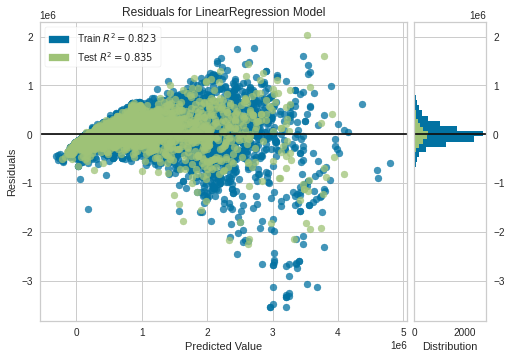

In [27]:
visualizer = ResidualsPlot(model)

#Ajustando os dados de treino ao visulizador
visualizer.fit(x_train_transformed, y_train)
#Avaliando o modelo nos dados de teste
visualizer.score(x_test_transformed, y_test)
visualizer.show()

## Random Forest

In [28]:
model = RandomForestRegressor(max_depth = 15)
model.fit(x_train_transformed, y_train)

y_pred_test = model.predict(x_test_transformed)
y_pred_train = model.predict(x_train_transformed)

In [29]:
mape_rf = mean_absolute_percentage_error(y_test, y_pred_test)

In [30]:
r2_rf = r2_score(y_test, y_pred_test)

In [33]:
mape_rf_train = mean_absolute_percentage_error(y_train, y_pred_train)

In [34]:
r2_rf_train = r2_score(y_train, y_pred_train)

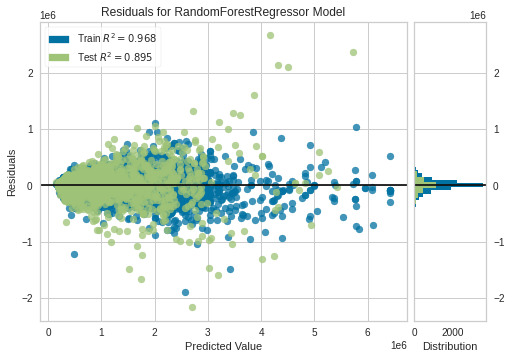

In [35]:
visualizer = ResidualsPlot(model)

#Ajustando os dados de treino ao visulizador
visualizer.fit(x_train_transformed, y_train)
#Avaliando o modelo nos dados de teste
visualizer.score(x_test_transformed, y_test)
visualizer.show()

##XGBoost

In [36]:
model = XGBRegressor(max_depth = 7)
model.fit(x_train_transformed, y_train)

y_pred_test = model.predict(x_test_transformed)
y_pred_train = model.predict(x_train_transformed)

[00:16:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [37]:
mape_xgboost = mean_absolute_percentage_error(y_test, y_pred_test)

In [39]:
r2_xgboost = r2_score(y_test, y_pred_test)

In [41]:
mape_xgboost_train = mean_absolute_percentage_error(y_train, y_pred_train)

In [42]:
r2_xgboost_train = r2_score(y_train, y_pred_train)

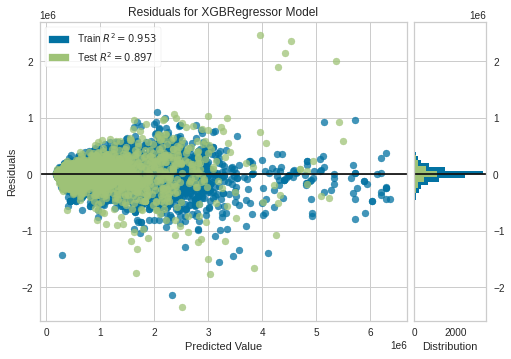

In [43]:
visualizer = ResidualsPlot(model)

#Ajustando os dados de treino ao visulizador
visualizer.fit(x_train_transformed, y_train)
#Avaliando o modelo nos dados de teste
visualizer.score(x_test_transformed, y_test)
visualizer.show()

## Catboost

In [44]:
scaler = MinMaxScaler()

data_pipeline = ColumnTransformer([("numerical", scaler, numerical_features)],
                                  remainder="passthrough")

In [45]:
x = df[numerical_features + categorical_features]
y = df[target]

x_train, x_test, y_train,y_test = train_test_split(x, y, test_size = .2, random_state=12345)

In [46]:
data_pipeline.fit(x_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('numerical', MinMaxScaler(),
                                 ['area', 'rooms', 'bathrooms', 'garages'])])

In [53]:
x_train_transformed = data_pipeline.transform(x_train)
x_test_transformed = data_pipeline.transform(x_test)


x_train_transformed = pd.DataFrame(x_train_transformed, columns=numerical_features + categorical_features)
x_test_transformed = pd.DataFrame(x_test_transformed, columns=numerical_features + categorical_features)

In [54]:
model = CatBoostRegressor(cat_features=["bairro"])
model.fit(x_train_transformed, y_train, eval_set=(x_test_transformed, y_test), verbose=False)

In [55]:
y_pred_test = model.predict(x_test_transformed)
y_pred_train = model.predict(x_train_transformed)

In [56]:
mape_catboost = mean_absolute_percentage_error(y_test, y_pred_test)

In [57]:
r2_catboost = r2_score(y_test, y_pred_test)

In [58]:
mape_catboost_train = mean_absolute_percentage_error(y_train, y_pred_train)

In [59]:
r2_catboost_train = r2_score(y_train, y_pred_train)

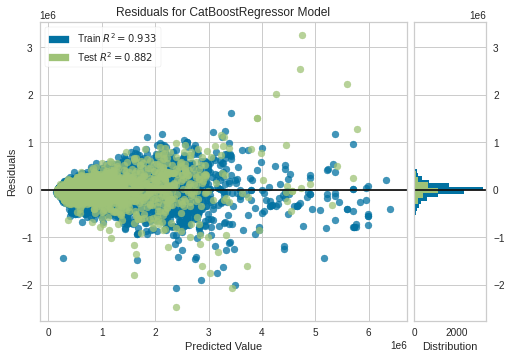

In [60]:
wrapper_model = wrap(model)
visualizer = ResidualsPlot(wrapper_model)

#Ajustando os dados de treino ao visulizador
visualizer.fit(x_train_transformed, y_train)
#Avaliando o modelo nos dados de teste
visualizer.score(x_test_transformed, y_test)
visualizer.show()

In [ ]:
### https://catboost.ai/

# Juntando

In [61]:
mapes = [mape_lr, mape_rf, mape_xgboost, mape_catboost]
r2s = [r2_lr, r2_rf, r2_xgboost, r2_catboost]
mapes_train = [mape_lr_train, mape_rf_train, mape_xgboost_train, mape_catboost_train]
r2s_train = [r2_lr_train, r2_rf_train, r2_xgboost_train, r2_catboost_train]

In [62]:
results = pd.DataFrame(zip(mapes,r2s, mapes_train, r2s_train), index=["linear_regression", "random_forest", "xgboost", "catboost"],
                       columns = ["mape", "r2", "mape_train", "r2_train"])
results.to_csv("resultados.csv")